<a href="https://colab.research.google.com/github/Areefahnk/NNDL-18K41A0505/blob/main/Assignment_05_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Simple Linear Regression Model using Mini Batch Gradient Descent (MBGD)**

**Implementation in Python by - AREEFA (18K41A0505)**

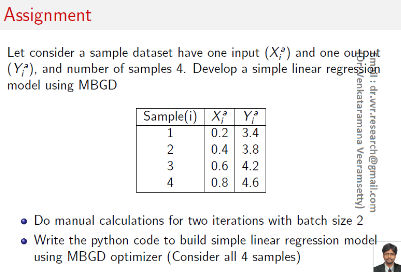

In [13]:
import sympy as sym
from sympy import *   
import random

In [45]:
import pandas as pd
df = pd.read_excel('/content/drive/MyDrive/samples.xlsx')
df

,sample,x,y
0,1,0.2,3.4
1,2,0.4,3.8
2,3,0.6,4.2
3,4,0.8,4.6


**STEP 2 Missing Values treatment**

**Found no missing values after visualizing datset**

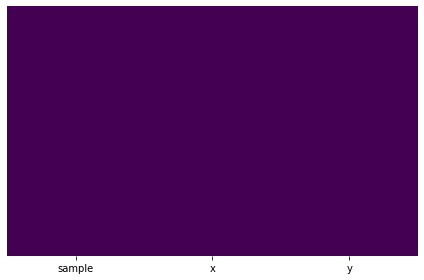

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns
def get_heatmap(df):
    #This function gives heatmap of all NaN values
    plt.figure(figsize=(6,4))
    sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')
    plt.tight_layout()
    return plt.show()

get_heatmap(df)

In [47]:
df

,sample,x,y
0,1,0.2,3.4
1,2,0.4,3.8
2,3,0.6,4.2
3,4,0.8,4.6


**STEP 3: Outlier Data Treatment**

In [48]:
import numpy as np
#df = pd.DataFrame({'Data':np.random.normal(size=200)})
# example dataset of normally distributed data. 

#df[np.abs(df.sample-df.sample.mean()) <= (3*df.sample.std())]
# keep only the ones that are within +3 to -3 standard deviations in the column 'sample'.
df[np.abs(df.x-df.x.mean()) <= (3*df.x.std())]
# keep only the ones that are within +3 to -3 standard deviations in the column 'x'.
df[np.abs(df.y-df.y.mean()) <= (3*df.y.std())]
# keep only the ones that are within +3 to -3 standard deviations in the column 'y'.

#df[~(np.abs(df.x-df.x.mean()) > (3*df.x.std()))]
# or if you prefer the other way around

,sample,x,y
0,1,0.2,3.4
1,2,0.4,3.8
2,3,0.6,4.2
3,4,0.8,4.6


**NORMALIZATION - MIN MAX SCALING**

**In our case no need to normalize data as one column values not dominating that much on other**

In [49]:
'''
def min_max_scaling(df):
  df_norm = df.copy()
  #apply min max scaling
  ct=0
  for column in df_norm.columns:
    if ct==0: #to skip normalization for the sample number column
      ct=1
    else:
      df_norm[column]=(df_norm[column]-df_norm[column].min())/(df_norm[column].max()-df_norm[column].min())
  return df_norm

df_norm = min_max_scaling(df)
df_norm'''

'\ndef min_max_scaling(df):\n  df_norm = df.copy()\n  #apply min max scaling\n  ct=0\n  for column in df_norm.columns:\n    if ct==0: #to skip normalization for the sample number column\n      ct=1\n    else:\n      df_norm[column]=(df_norm[column]-df_norm[column].min())/(df_norm[column].max()-df_norm[column].min())\n  return df_norm\n\ndf_norm = min_max_scaling(df)\ndf_norm'

**Testing dataset - for this time lets take it as seperate dataset**



In [265]:
df_test = [[1,1.0,5],[2,1.2,5.4],[3,1.3,5.8]]
df_test = pd.DataFrame(df_test,columns=['sample','x','y'])
df_test

,sample,x,y
0,1,1.0,5.0
1,2,1.2,5.4
2,3,1.3,5.8


**Training dataset**

In [266]:
df_train=df.copy()
df_train

,sample,x,y
0,1,0.2,3.4
1,2,0.4,3.8
2,3,0.6,4.2
3,4,0.8,4.6


In [267]:
x_train = df_train.iloc[:,1:2]
y_train=df_train.iloc[:,2:3]

In [268]:
#step 1 initialization
m=1
c=-1
n=0.1
epoch=100
bs=2
#step 2 Split training dataset based on bs
ns = df_train.shape[0]
print('Number of samples:',ns) #number of samples
bs=2 #batch size
nb = (ns//bs) #number of batches
print('Number of batches:',nb)




Number of samples: 4
Number of batches: 2


In [269]:
x_train.shape[0]

4

In [270]:
x_train

,x
0,0.2
1,0.4
2,0.6
3,0.8


In [271]:
y_train

,y
0,3.4
1,3.8
2,4.2
3,4.6


In [272]:
batch_size = bs
n_minibatches = x_train.shape[0] // batch_size

def create_mini_batches(x_tr, y_tr, batch_size):
    mini_batches = [] 
    global n_minibatches
    for i in range(0,n_minibatches): 
        X_mini = x_tr['x'][i * batch_size : (i + 1) * batch_size]
        print('X_mini')
        print(X_mini)
        #X_mini1 = X_mini['x'][1:]
        #print('X_mini1')
        #print(X_mini1)
        Y_mini = y_tr['y'][i * batch_size : (i + 1) * batch_size]
        mini_batches.append((X_mini, Y_mini)) 
        if x_tr.shape[0] % batch_size != 0:
            X_mini = x_tr[i * batch_size: x_tr.shape[0]]
            Y_mini  = y_tr[i * batch_size: y_tr.shape[0]]
            mini_batches.append((X_mini,Y_mini)) 
    return mini_batches 

mini_batches_all = create_mini_batches(x_train, y_train, batch_size)
print(mini_batches_all)

X_mini
0    0.2
1    0.4
Name: x, dtype: float64
X_mini
2    0.6
3    0.8
Name: x, dtype: float64
[(0    0.2
1    0.4
Name: x, dtype: float64, 0    3.4
1    3.8
Name: y, dtype: float64), (2    0.6
3    0.8
Name: x, dtype: float64, 2    4.2
3    4.6
Name: y, dtype: float64)]


In [273]:
mini_batches_all[1]

(2    0.6
 3    0.8
 Name: x, dtype: float64, 2    4.2
 3    4.6
 Name: y, dtype: float64)

In [274]:
for i in range(n_minibatches):
  x_b,y_b = mini_batches_all[i]
  print(x_b)
  print(y_b)

0    0.2
1    0.4
Name: x, dtype: float64
0    3.4
1    3.8
Name: y, dtype: float64
2    0.6
3    0.8
Name: x, dtype: float64
2    4.2
3    4.6
Name: y, dtype: float64


In [376]:
m = 1 #Initial value of slope
c = -1 #Initial value of intercept
lr = 0.1 #Learning Rate
delta_m = 1 #Initialising Δm
delta_c = 1 #Initialising Δc
epochs = 30 #Maximum number of iterations  
iter= 0 #Counting Iterations

def gradient_calc(x_b,y_b,m,c):
  deriveE_m = 0
  deriveE_c = 0
  for i in range(x_b.shape[0]):
    x,y = x_b.iloc[i],y_b.iloc[i]
    deriveE_m += (y-m*x-c)*(x)
    deriveE_c+=(y-m*x-c)
    deriveE_m=-(deriveE_m)/len(x_b)
    deriveE_c=-(deriveE_c)/len(x_b)
    #print('derives')
    #print(deriveE_mderiveE_c)
  return deriveE_m,deriveE_c

while iter<epochs:
  iter=iter+1
  print("Iteration {}".format(iter))
  for i in range(n_minibatches):
    x_b,y_b = mini_batches_all[i]
    deriveE_m,deriveE_c=gradient_calc(x_b,y_b,m,c)
     #step 6: find step length
    delta_m = -lr*deriveE_m
    delta_c = -lr*deriveE_c
     #step 7: update model params m and c
    m = m+delta_m
    c = c+delta_c
     #step 8: update batch number
     #next batch in loop i++
  #step 10 iter = iter+1 (in loop - while)
  #step 11 check convergence criteria (checked in loop - while)
  print("Updated values m:{}".format(m)+" c:{}".format(c))

#step 12 print m,c


Iteration 1
Updated values m:1.185584 c:-0.7645500000000001
Iteration 2
Updated values m:1.356510339524 c:-0.5479583388000001
Iteration 3
Updated values m:1.5139469328436288 c:-0.34872271309302194
Iteration 4
Updated values m:1.6589686479063448 c:-0.16546050665214507
Iteration 5
Updated values m:1.7925647192390655 c:0.0031007450139047127
Iteration 6
Updated values m:1.915645570273513 c:0.15813213033424223
Iteration 7
Updated values m:2.0290490921440285 c:0.3007114382005742
Iteration 8
Updated values m:2.133546422260128 c:0.43183059104366417
Iteration 9
Updated values m:2.2298472625062216 c:0.5524024857243625
Iteration 10
Updated values m:2.3186047737459163 c:0.6632672894179982
Iteration 11
Updated values m:2.4004200803862825 c:0.7651982339122398
Iteration 12
Updated values m:2.4758464160681863 c:0.8589069482793011
Iteration 13
Updated values m:2.545392939073812 c:0.9450483666997255
Iteration 14
Updated values m:2.609528243764651 c:1.024225245284977
Iteration 15
Updated values m:2.66868

**Calculating Training Error**

In [377]:
x_train

,x
0,0.2
1,0.4
2,0.6
3,0.8


In [378]:
y_train

,y
0,3.4
1,3.8
2,4.2
3,4.6


In [379]:
print("m and c values after applying MBGD Algo:")
print(m)
print(c)

m and c values after applying MBGD Algo:
3.1664436907817595
1.6869041636758424


In [380]:
y_train_pred = []
for i in range(0,len(x_train)):
  ycalc = (m*x_train['x'][i]+c).round(1)
  y_train_pred.append(ycalc)
y_train_pred

[2.3, 3.0, 3.6, 4.2]

In [381]:
y_train_list = list(y_train['y']) #typecasting tuple to list
y_train_list

[3.4, 3.8, 4.2, 4.6]

In [400]:
MSError_train = []
mse_train_total=0
for i in range(0,len(x_train)):
  mse_train = (y_train_list[i]-y_train_pred[i])
  mse_train_total+=mse_train
  MSError_train.append(mse_train)

print('MSE - TRAINING ERROR obtained:')
print(MSError_train)
print('Mean square error: ',mse_train_total/(len(x_train)))


MSE - TRAINING ERROR obtained:
[1.1, 0.7999999999999998, 0.6000000000000001, 0.39999999999999947]
Mean square error:  0.7249999999999999


In [383]:
x_train_list = list(x_train['x']) #typecasting tuple to list
x_train_list

[0.2, 0.4, 0.6, 0.8]

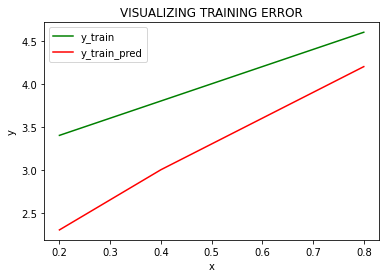

In [384]:
#Plot a line graph
plt.plot(x_train_list,y_train_list,label='y_train',color='green')
plt.plot(x_train_list,y_train_pred,label='y_train_pred',color='red')

# Add labels and title
plt.title("VISUALIZING TRAINING ERROR")
plt.xlabel("x")
plt.ylabel("y")
 
plt.legend()
plt.show()

**Calculating Testing Error**

In [385]:
df_test

,sample,x,y
0,1,1.0,5.0
1,2,1.2,5.4
2,3,1.3,5.8


In [386]:
x_test = df_test.iloc[:,1:2]
y_test = df_test.iloc[:,2:]

In [387]:
x_test

,x
0,1.0
1,1.2
2,1.3


In [388]:
y_test

,y
0,5.0
1,5.4
2,5.8


In [389]:
y_test_pred = []
for i in range(0,3):
  ycalc = m*x_test['x'][i]+c
  y_test_pred.append(ycalc)
y_test_pred

[4.853347854457602, 5.486636592613953, 5.8032809616921295]

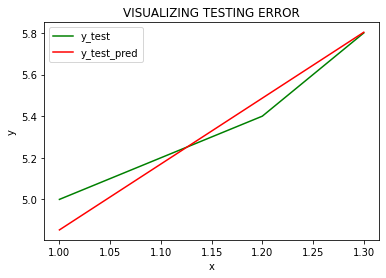

In [390]:
x_test_list = list(x_test['x'])
y_test_list = list(y_test['y'])
#Plot a line graph
plt.plot(x_test_list,y_test_list,label='y_test',color='green')
plt.plot(x_test_list,y_test_pred,label='y_test_pred',color='red')

# Add labels and title
plt.title("VISUALIZING TESTING ERROR")
plt.xlabel("x")
plt.ylabel("y")
 
plt.legend()
plt.show()

In [399]:
mse_test_total=0
MSError_test = []
for i in range(0,len(x_test)):
  mse_test = (y_test_list[i]-y_test_pred[i])
  mse_test_total+=mse_test
  MSError_test.append(mse_test)


print('MSE - TESTING ERROR obtained:')
print(MSError_test)
print('Mean Square Error: ',mse_test_total/len(x_test))

MSE - TESTING ERROR obtained:
[0.14665214554239814, -0.08663659261395296, -0.003280961692129658]
Mean Square Error:  0.018911530412105176


**Testing Error is very less when compared to training error. Thus, model is accepted**

**We can deploy and run this in backend through Flask App**

**BUT FOR TRIAL LETS TAKE USER INPUT (SIMPLE PYTHON)**

In [404]:
print("EQUATION is y=mx+c")
x = float(input('Enter x value to predict y value:'))

y = (m*x+c).round(2)
y_test_pred.append(y)
print('Predicted y value: {}'.format(y))

EQUATION is y=mx+c
Enter x value to predict y value:2.2
Predicted y value: 8.66


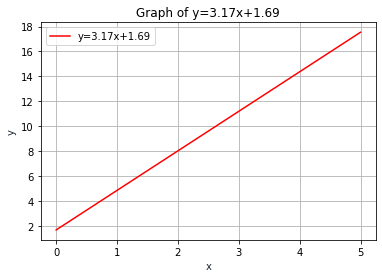

In [393]:
import matplotlib.pyplot as plt
import numpy as np
m=m.round(2)
c=c.round(2)
x = np.linspace(0,5,100)
y = m*x+c
plt.plot(x, y, '-r', label='y='+str(m)+'x+'+str(c))
plt.title('Graph of '+'y='+str(m)+'x+'+str(c))
plt.xlabel('x', color='#1C2833')
plt.ylabel('y', color='#1C2833')
plt.legend(loc='upper left')
plt.grid()
plt.show()